In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

import numpy as np

# Constants
tau = 2.5e-3  # mean lifetime in seconds
mu_v = 2000  # mean velocity in m/s
sigma_v = 50  # SDdev of velocity in m/s

# Creating function to generate beam velocity 
def simulate_beam_velocity(mu_v, sigma_v):
    """
    Generating particle velocity randomly from a normal distribution 

    Parameters:
    -----------
    - mu_v: Mean velocity
    - sigma_v: Standard deviation of velocity 

    Returns:
    --------
    - A velocity value 
    """
    return np.random.normal(mu_v, sigma_v)

def simulate_decay_time(tau):
    """
    Generating particle decay time randomly from a exponential decay distribution 

    Parameters:
    -----------
    - tau: Average decay time   

    Returns:
    --------
    - A decay time value 
    """
    return np.random.exponential(tau)
    
def simulate_decay_vertex(velocity, decay_time):
    """
    Generating decay vertex for particle 

    Parameters:
    -----------
    - mu_v: Randomly generated velocity value
    - decay_time: Randomly generated time taken to decay 

    Returns:
    --------
    - A vertex decay distance value  
    """
    # Calculating the decay distance
    decay_distance = velocity * decay_time

    # Assuming the particle is moving along the z-axis
    decay_vertex = np.array([0, 0, decay_distance]) # Put into 3D vector 

    return decay_vertex



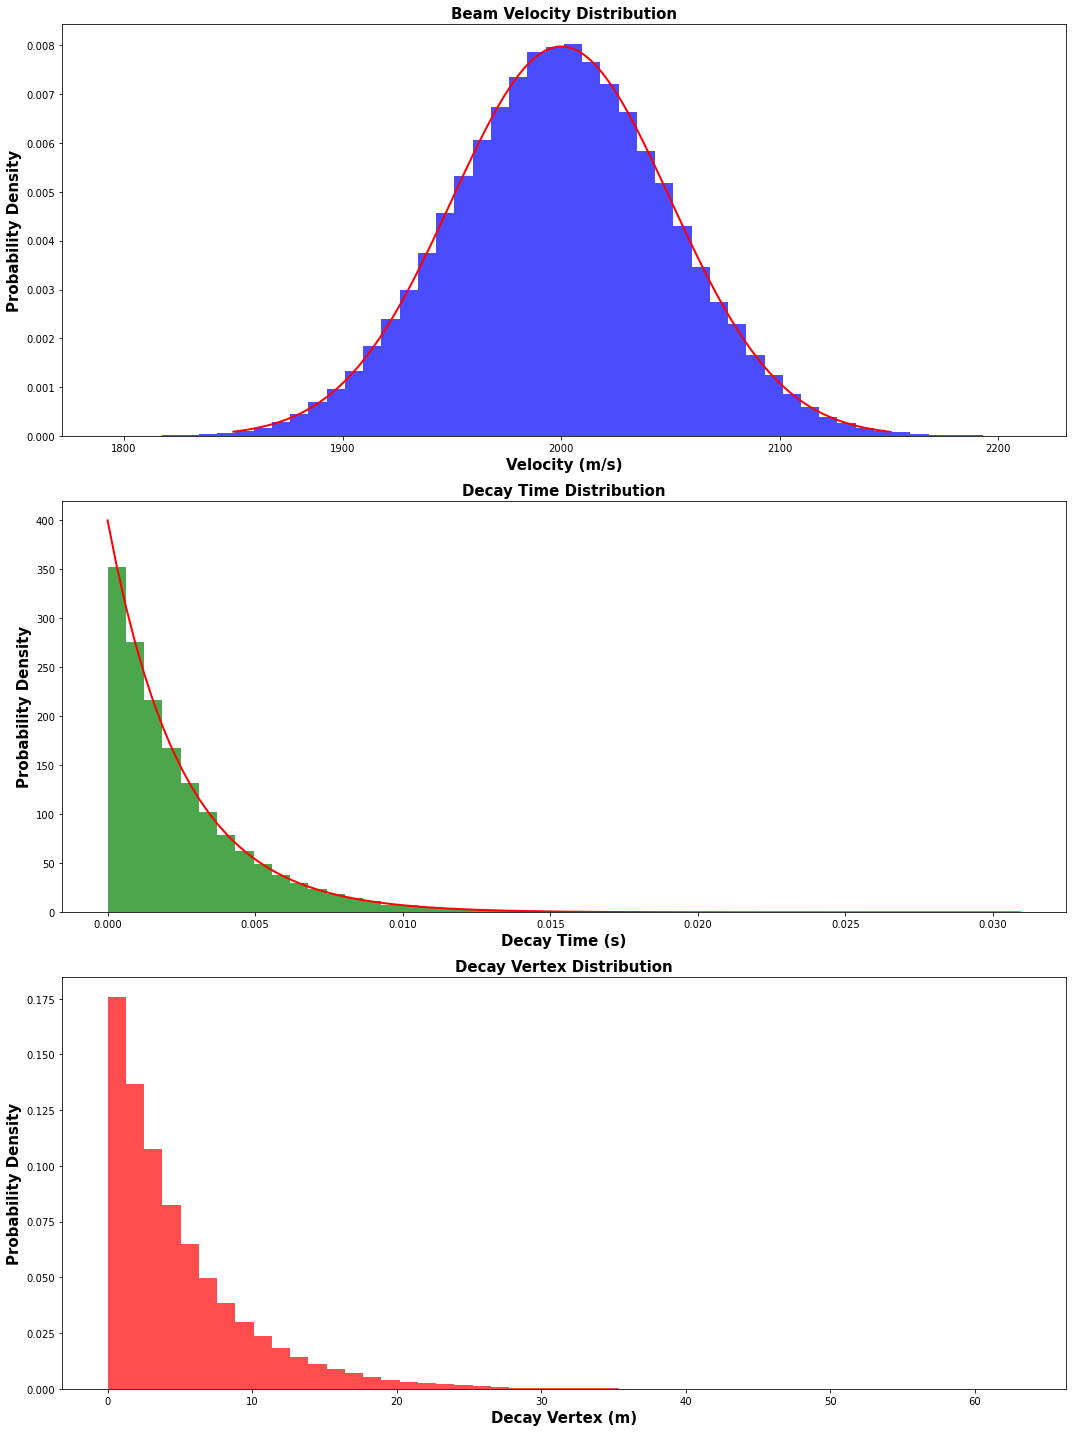

In [2]:
import matplotlib.pyplot as plt # Imported to plot graphs and display data

# Number of simulations
N = 100000

# Generating velocities, decay and decay vertex to ensure code works
velocities = [simulate_beam_velocity(mu_v, sigma_v) for _ in range(N)] 
decay_times = [simulate_decay_time(tau) for _ in range(N)]
decay_vertices = [simulate_decay_vertex(velocities[i], decay_times[i])[2] for i in range(N)]


# Creating subplots to show the velocity, decay and decay vertex values follow their expected distributions
fig, axs = plt.subplots(3, figsize=(15, 20))

# Plotting velocity probability density distribution as a histogram
axs[0].hist(velocities, bins=50, density = 'true', color='blue', alpha=0.7)
axs[0].set_title('Beam Velocity Distribution', fontsize = 15, fontweight = 'bold')
axs[0].set_xlabel('Velocity (m/s)', fontsize = 15, fontweight = 'bold')
axs[0].set_ylabel('Probability Density', fontsize = 15, fontweight = 'bold')

# Generating a range of velocities around the mean velocity, with 3 SD either side
velocities_range = np.linspace(mu_v - 3*sigma_v, mu_v + 3*sigma_v, 100)

# Generating the corresponding normal distribution 
velocities_normal = norm.pdf(velocities_range, mu_v, sigma_v)

# Ploting the perfect normal distribution for comparison
axs[0].plot(velocities_range, velocities_normal, 'r', linewidth=2)

# Plotting decay time probability distribution as a histogram
axs[1].hist(decay_times, bins=50, color='green', alpha=0.7, density = 'true')
axs[1].set_title('Decay Time Distribution', fontsize = 15, fontweight = 'bold')
axs[1].set_xlabel('Decay Time (s)', fontsize = 15, fontweight = 'bold')
axs[1].set_ylabel('Probability Density', fontsize = 15, fontweight = 'bold')

# Generating a range of decay times for the fit
decay_times_range = np.linspace(min(decay_times), max(decay_times), 100)

# Generating the corresponding perfect exponential distribution
decay_times_exponential = expon.pdf(decay_times_range, scale=tau)

# Ploting the perfect exponential distribution as a comparison 
axs[1].plot(decay_times_range, decay_times_exponential, 'r-', linewidth=2)

# Plotting the decay vertex probability distribution
axs[2].hist(decay_vertices, bins=50, color='red', alpha=0.7, density = 'true')
axs[2].set_title('Decay Vertex Distribution', fontsize = 15, fontweight = 'bold')
axs[2].set_xlabel('Decay Vertex (m)', fontsize = 15, fontweight = 'bold')
axs[2].set_ylabel('Probability Density', fontsize = 15, fontweight = 'bold')

# Plotting graphs 
plt.tight_layout() # This makes the graph fit better 
plt.show()

In [3]:
def decay_direction():
    """
    Generating particle decay direction randomly around a sphere 
    
    Returns:
    --------
    - A unit vector in a random direction  
    """
    # Generating phi with a uniform distribution between 0 and 2*pi
    phi = np.random.uniform(0, 2*np.pi)

    # Generating theta with a distribution proportional to sin(theta)
    theta = np.arccos(1 - 2*np.random.uniform(0, 1))

    # Converting from spherical coordinates to Cartesian coordinates
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    
    return np.array([x, y, z]) 

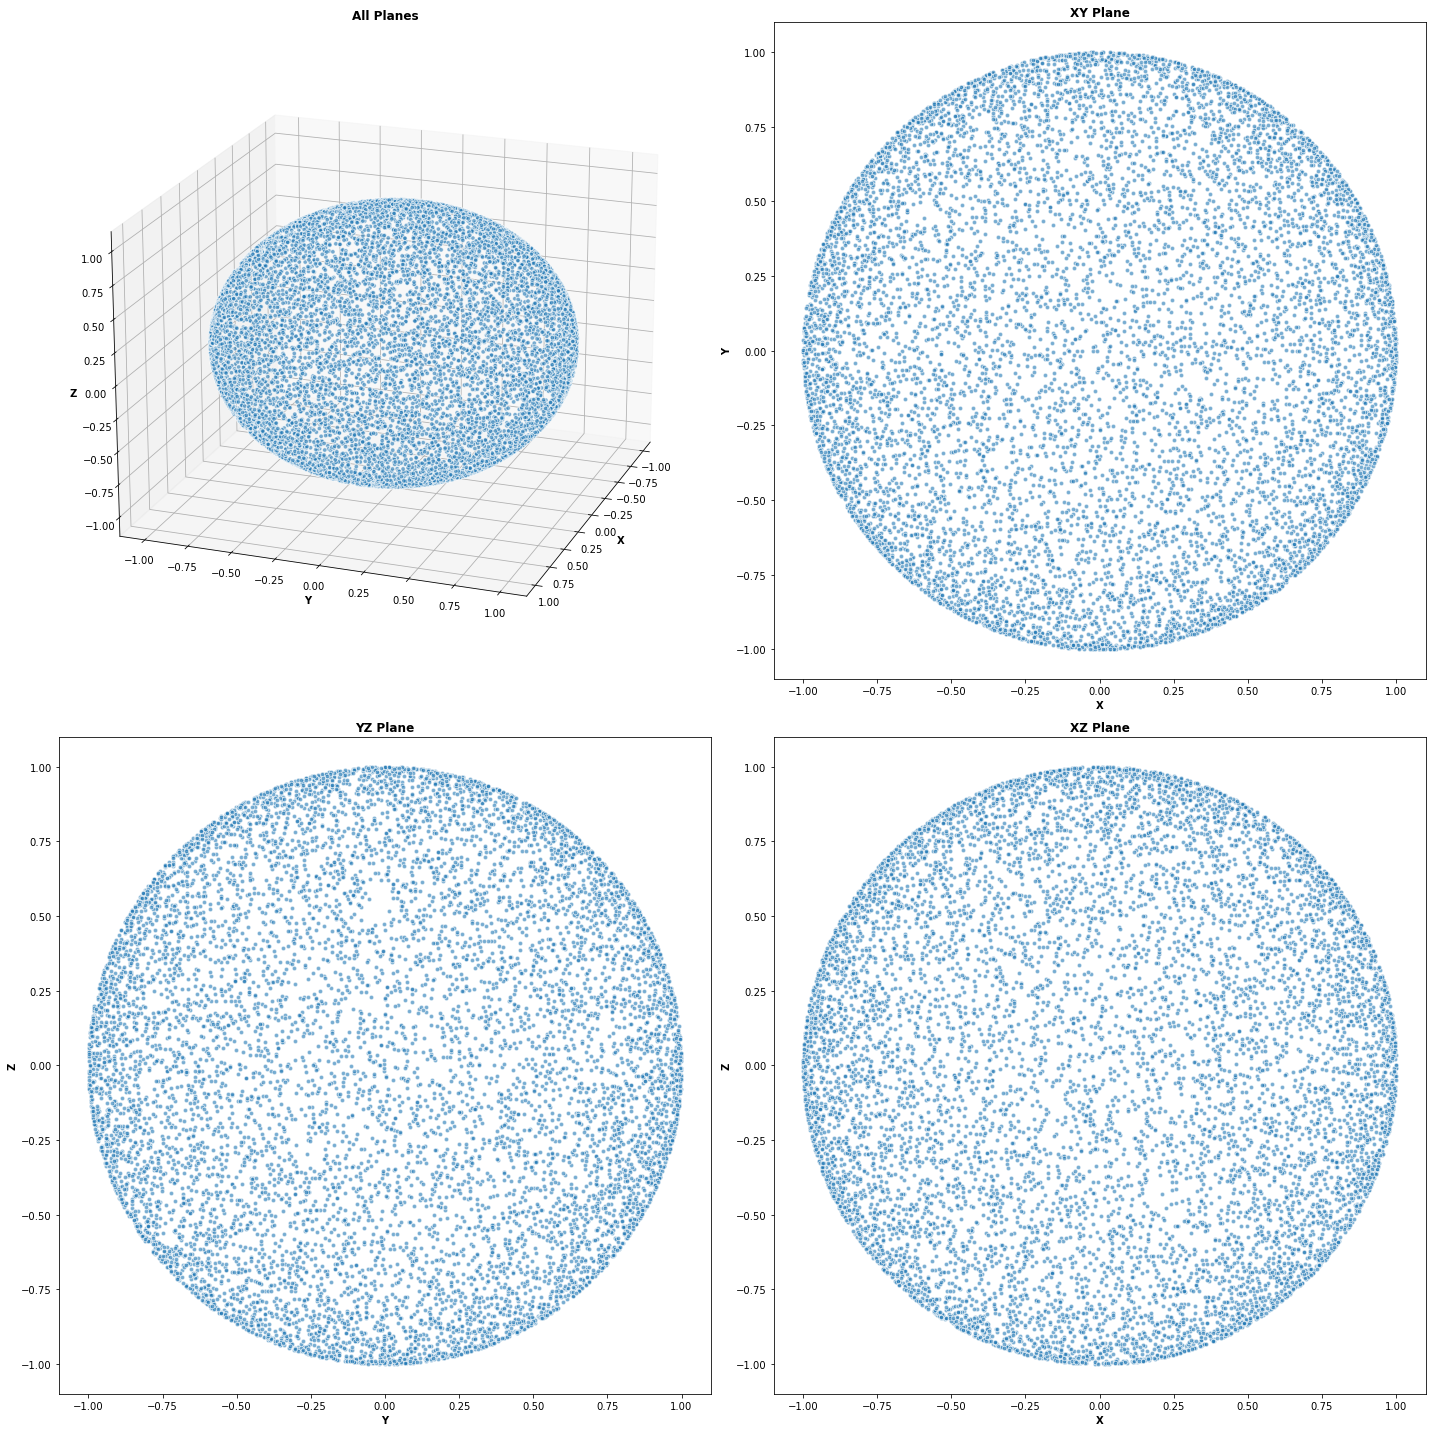

In [4]:
from mpl_toolkits.mplot3d import Axes3D # Imported to show 3D plots 


# Number of simulations
N = 10000

# Simulating decay directions N times 
directions = np.array([decay_direction() for _ in range(N)])

# Creating 4 subplots
fig = plt.figure(figsize=(20, 20))

# Plotting all planes
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(directions[:,0], directions[:,1], directions[:,2], alpha=0.6, edgecolors='w', s=20)
ax1.set_xlabel('X', fontweight = 'bold')
ax1.set_ylabel('Y', fontweight = 'bold')
ax1.set_zlabel('Z', fontweight = 'bold')
ax1.set_title('All Planes', fontweight = 'bold')
ax1.view_init(20, 20)

# Plotting XY plane
ax2 = fig.add_subplot(222)
ax2.scatter(directions[:,0], directions[:,1], alpha=0.6, edgecolors='w', s=20)
ax2.set_xlabel('X', fontweight = 'bold')
ax2.set_ylabel('Y', fontweight = 'bold')
ax2.set_title('XY Plane', fontweight = 'bold')

# Plotting YZ plane
ax3 = fig.add_subplot(223)
ax3.scatter(directions[:,1], directions[:,2], alpha=0.6, edgecolors='w', s=20)
ax3.set_xlabel('Y', fontweight = 'bold')
ax3.set_ylabel('Z', fontweight = 'bold')
ax3.set_title('YZ Plane', fontweight = 'bold')

# Plotting XZ plane
ax4 = fig.add_subplot(224)
ax4.scatter(directions[:,0], directions[:,2], alpha=0.6, edgecolors='w', s=20)
ax4.set_xlabel('X', fontweight = 'bold')
ax4.set_ylabel('Z', fontweight = 'bold')
ax4.set_title('XZ Plane', fontweight = 'bold')

# Plotting graphs 
plt.tight_layout()
plt.show()


In [5]:
def calculate_gradients_and_intercepts(direction, decay_vertex):
    """
    Calculating gradients and intercepts  

    Parameters:
    -----------
    - direction: The decay_direction function is called and a random direction will be given 
    - decay_vertex: Decay vertex value 

    Returns:
    --------
    - Gradient for both x and y, in relation to z
    - Intercept for both x and y, in relation to z
    """
    # Calculating the gradients for both x and y 
    m_x = direction[0] / direction[2]
    m_y = direction[1] / direction[2]

    # Calculating the intercepts for x and y 
    c_x = decay_vertex[0] - m_x * decay_vertex[2]
    c_y = decay_vertex[1] - m_y * decay_vertex[2]

    return m_x, m_y, c_x, c_y

In [6]:
# Defining the direction and decay vertex
direction = decay_direction()
decay_vertex = np.array([0, 0, 0])

# Calculating the gradients and intercepts
m_x, m_y, c_x, c_y = calculate_gradients_and_intercepts(direction, decay_vertex)

# Defining the z coordinates of the tracking stations
z_stations = np.array([30, 35, 40, 45])

# Calculating the x and y coordinates at the tracking stations
x_hits = m_x * z_stations + c_x
y_hits = m_y * z_stations + c_y

# Showing an example version. Although it doesnt have z direction condition in, it still shows it works
for i in range(len(z_stations)):
    print(f"At z = {z_stations[i]} m, x = {x_hits[i]} m and y = {y_hits[i]} m")




At z = 30 m, x = 98.0719494013023 m and y = 24.768605060863596 m
At z = 35 m, x = 114.41727430151936 m and y = 28.896705904340863 m
At z = 40 m, x = 130.7625992017364 m and y = 33.024806747818126 m
At z = 45 m, x = 147.10792410195347 m and y = 37.152907591295396 m


In [7]:
def smear_hit_positions(true_positions, resolution):
    """
    Smearing hit positions with an offsett 

    Parameters:
    -----------
    - true_positions: Positions worked out from the gradients and intercepts 
    - resolution: The detector resolution 

    Returns:
    --------
    - The smeared positions  
    """
    # Calculating the offsets by taking an offset value from a normal distribution centered around the true position value with SD equal to the resolution
    offsets = np.random.normal(0, resolution, true_positions.shape) # .Shape needed due to sizing array sizing issues

    # Adding the offsets to the true positions to get the smeared positions
    smeared_positions = true_positions + offsets

    return smeared_positions

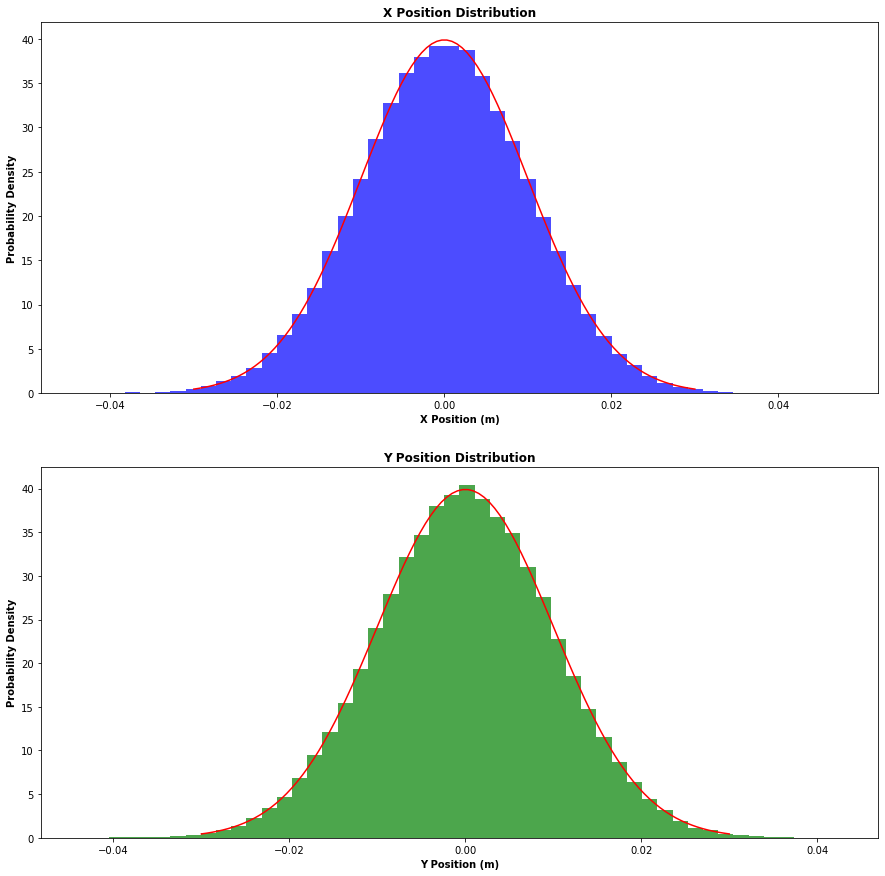

In [8]:
# Number of simulations
N = 100000

resolution = 0.01

# Simulating smearing for the position multiple times for both x and y positions both at 0 
true_positions = np.array([np.array([0, 0, 0]) for _ in range(N)])
true_positions_distribution = np.random.normal(0, resolution, true_positions.shape)
smeared_positions = np.array([smear_hit_positions(pos, resolution) for pos in true_positions])

# Create subplots
fig, axs = plt.subplots(2, figsize=(15, 15))

# Plot x distribution smeared 
axs[0].hist(smeared_positions[:,0], bins=50,  color='blue', density = 'true', alpha=0.7)
axs[0].set_title('X Position Distribution', fontweight = 'bold')
axs[0].set_xlabel('X Position (m)', fontweight = 'bold')
axs[0].set_ylabel('Probability Density', fontweight = 'bold')
# Add a normal distribution centered at 0
x = np.linspace(-3*resolution, 3*resolution, 100)
axs[0].plot(x, norm.pdf(x, 0, resolution), 'r-')

# Plot y distribution smeared 
axs[1].hist(smeared_positions[:,1], bins=50, color='green', density = 'true', alpha=0.7)
axs[1].set_title('Y Position Distribution', fontweight = 'bold')
axs[1].set_xlabel('Y Position (m)', fontweight = 'bold')
axs[1].set_ylabel('Probability Density', fontweight = 'bold')
axs[1].plot(x, norm.pdf(x, 0, resolution), 'r-')


plt.show()

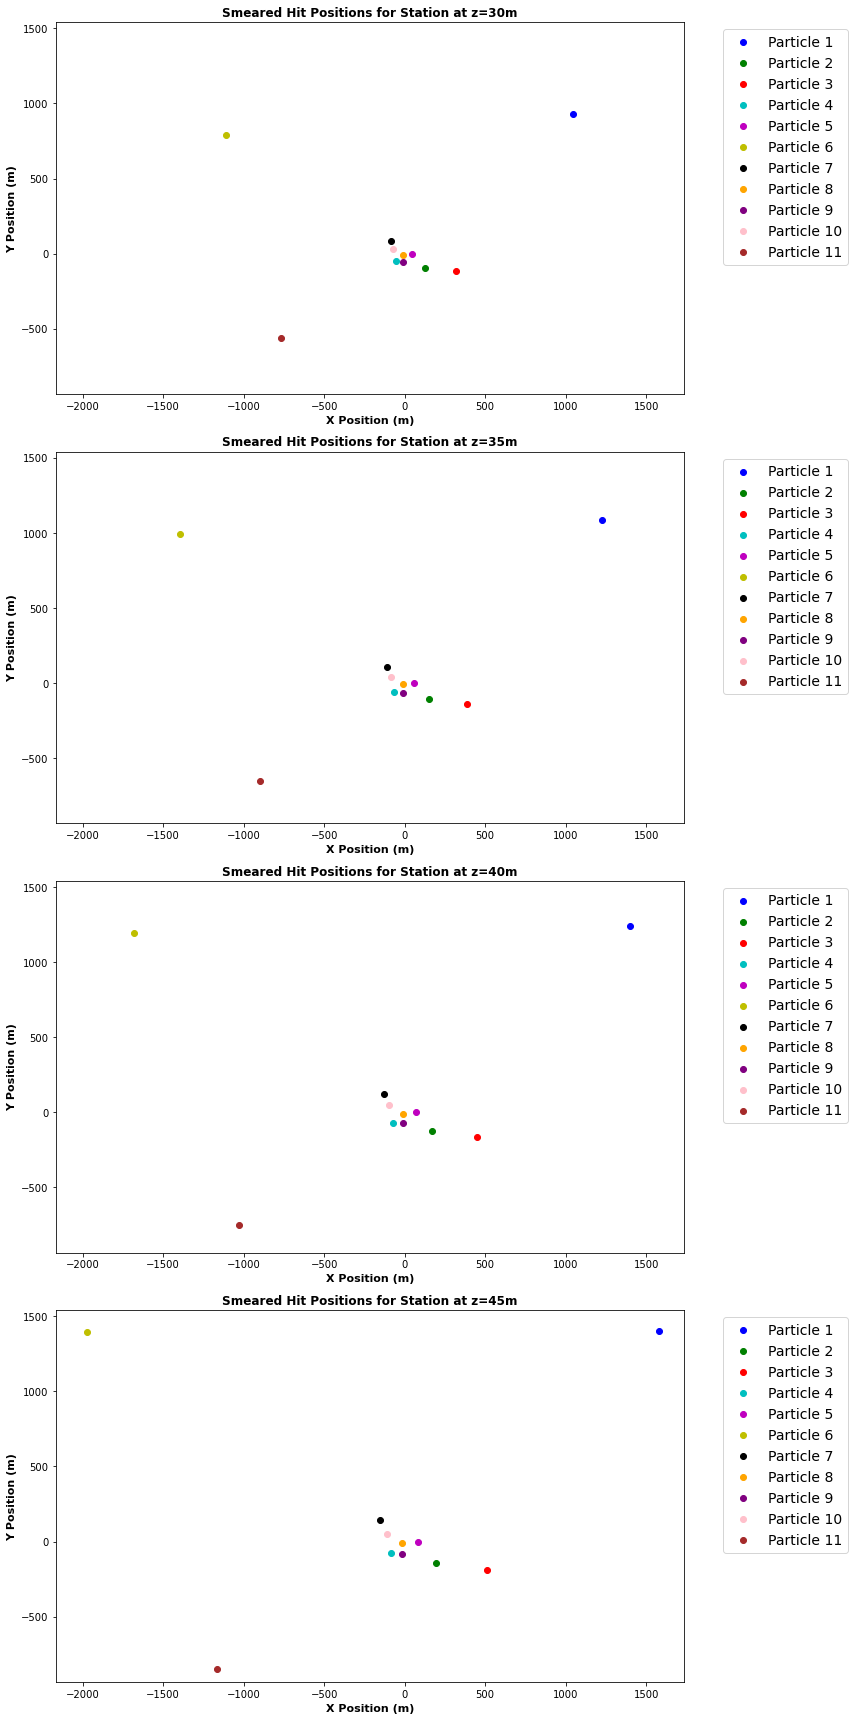

In [9]:
N = 20  # Number of particles 

z_stations = np.array([30, 35, 40, 45])  # z coordinates of the tracking stations
resolution = 0.01  # Detector resolution in meters 

# Initializing a dictionary to store the hit positions for each station
Particle_position_hits_per_station = {z: [] for z in z_stations}

# Iterating over each particle to get essential information that can be infferred below 
for i in range(N):
    velocity = simulate_beam_velocity(mu_v, sigma_v) 
    decay_time = simulate_decay_time(tau)
    decay_vertex = simulate_decay_vertex(velocity, decay_time)
    direction = decay_direction()
    m_x, m_y, c_x, c_y = calculate_gradients_and_intercepts(direction, decay_vertex)
    # Check if the decay direction is pointed towards z
    if direction[2] <= 0:  # If z-component of direction is 0, the direction is perpendicular to z
        continue  # Skip this particle
    
    for z in z_stations:  # Cycling through each z station to find where it hits for each particle 
        x_position = m_x * z + c_x
        y_position = m_y * z + c_y
        smeared_positions_x = smear_hit_positions(x_position, resolution) # Smearing in x
        smeared_positions_y = smear_hit_positions(y_position, resolution) # Smearing in y 
        Particle_position_hits_per_station[z].append([smeared_positions_x, smeared_positions_y]) # Adding the x and y value for each z station for each particle decay
        

# Converting the lists to numpy arrays for easier manipulation
for i in Particle_position_hits_per_station:
    Particle_position_hits_per_station[i] = np.array(Particle_position_hits_per_station[i])
    
# Creating a figure with 4 subplots, arranged in 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(12, 24))  

# Defining a list of colors for each particle decay 

# Note - this list is extensive so that with increased number of particles, particles will still easily be able to identified
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'teal', 'indigo', 'violet']
# Note - Although I spelt it in the american way it is easier as the whole of matplotlib is in american english

# Creating a graph for hit positions for each z station 
for i in range(4):
    # Getting the z station and hit positions for this index
    z = z_stations[i]
    hits = Particle_position_hits_per_station[z]
    # Creating a scatter plot for this station in the i-th subplot
    for j in range(len(hits)):
        # Plotting each particle decay hit position (x and y co-ordinates)
        axs[i].scatter(hits[j,0], hits[j,1], color=colors[j%len(colors)], label=f'Particle {j + 1}') 
        
    # Adding and formatting graph labels 
    axs[i].set_title(f'Smeared Hit Positions for Station at z={z}m', weight = 'bold', fontsize = 12)
    axs[i].set_xlabel('X Position (m)', fontweight = 'bold', fontsize = 11)
    axs[i].set_ylabel('Y Position (m)', fontweight = 'bold', fontsize = 11)
    axs[i].legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

# Define the min and max values for x and y. NOTE - Infinities needed here as random decay means that all values could be negative/positive so if any were set to 0, then it wouldn't work
x_min = float('inf')
x_max = float('-inf')
y_min = float('inf')
y_max = float('-inf')

# Looping over each z station to find the max and min values for x and y 
for z in Particle_position_hits_per_station:
    # Updating the min and max values for x and y, then multiplying by 10 % 
    x_min = min(x_min, np.min(Particle_position_hits_per_station[z][:, 0])) * 1.1
    x_max = max(x_max, np.max(Particle_position_hits_per_station[z][:, 0])) * 1.1
    y_min = min(y_min, np.min(Particle_position_hits_per_station[z][:, 1])) * 1.1
    y_max = max(y_max, np.max(Particle_position_hits_per_station[z][:, 1])) * 1.1

# Setting the same x and y limits for each subplot to show movement of particles
for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
# Adjusting the space between the plots
plt.subplots_adjust(hspace = 0.5)

# Automatically adjust subplot parameters to help with formatting 
plt.tight_layout()

# Showing the plot
plt.show()

## Reconstructing Vertex Decay

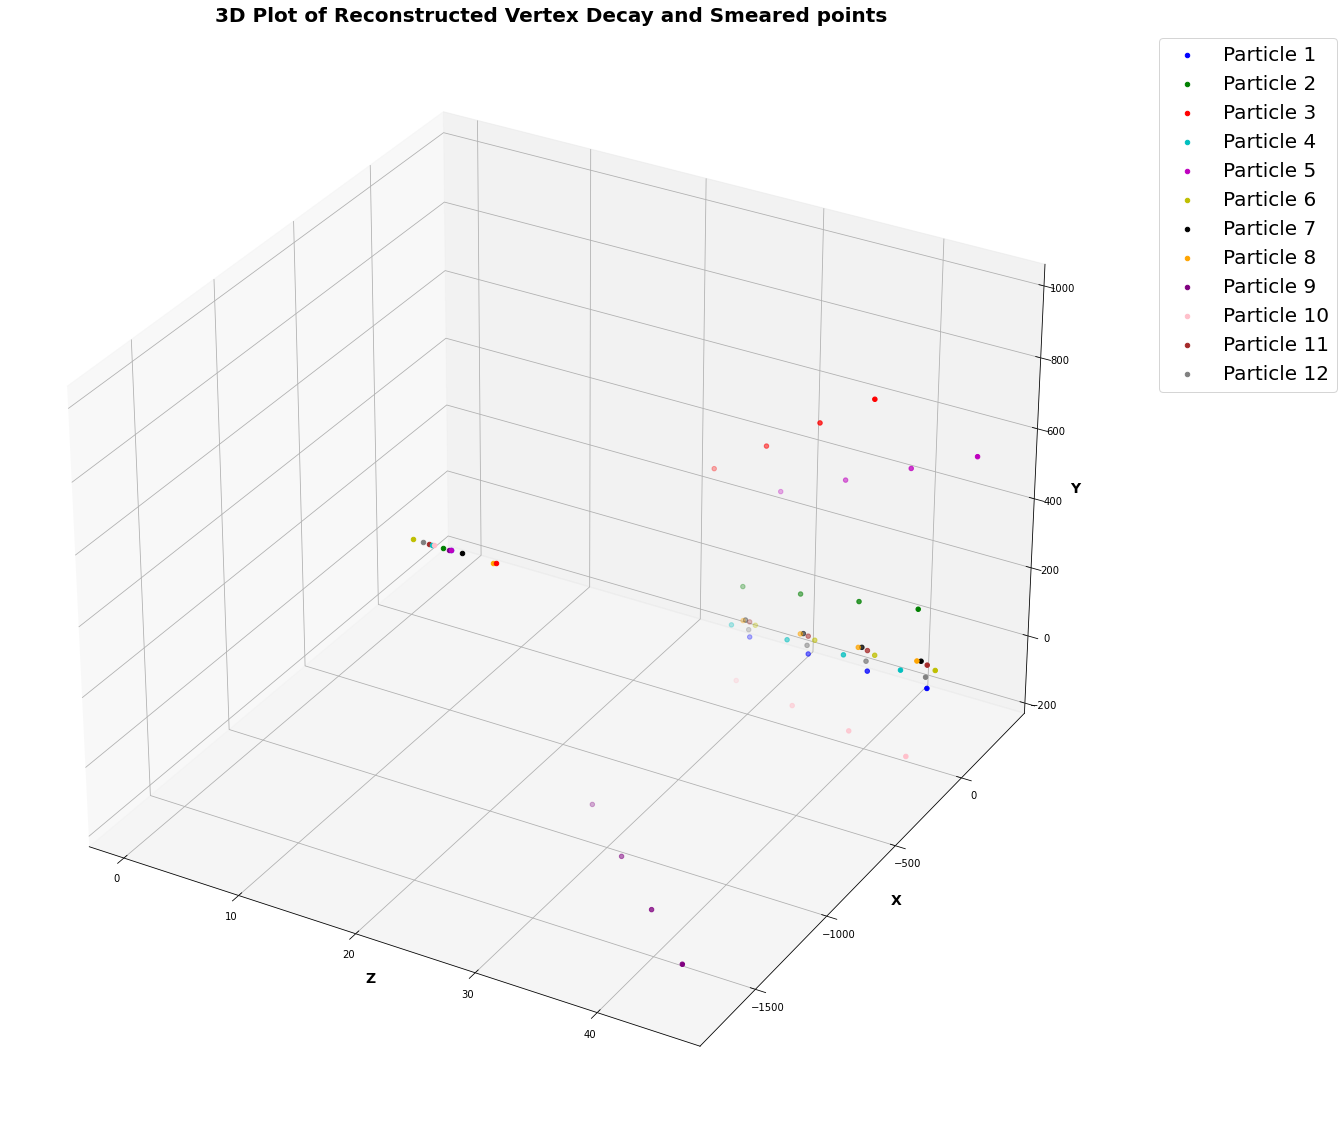

In [10]:
N = 20  # Number of particles 

z_stations = np.array([30, 35, 40, 45])  # z coordinates of the tracking stations
resolution = 0.01  # Detector resolution in meters 

# Initializing a dictionary to store the hit positions for each station
Particle_position_hits_per_station = {z: [] for z in z_stations}

successful_hits = 0 # Recoring the successful hits for when reconstructing the vertex decays 
# Iterating over each particle to get essential information that can be infferred below 
for i in range(N):
    velocity = simulate_beam_velocity(mu_v, sigma_v) 
    decay_time = simulate_decay_time(tau)
    decay_vertex = simulate_decay_vertex(velocity, decay_time)
    direction = decay_direction()
    # Check if the decay direction is pointed towards z
    if direction[2] <= 0:  # If z-component of direction is 0, the direction is perpendicular to z
        continue  # Skip this particle
    successful_hits = successful_hits + 1    
    m_x, m_y, c_x, c_y = calculate_gradients_and_intercepts(direction, decay_vertex)
    
    for z in z_stations:  # Cycling through each z station to find where it hits for each particle 
        x_position = m_x * z + c_x
        y_position = m_y * z + c_y
        smeared_positions_x = smear_hit_positions(x_position, resolution) # Smearing in x
        smeared_positions_y = smear_hit_positions(y_position, resolution) # Smearing in y 
        Particle_position_hits_per_station[z].append([smeared_positions_x, smeared_positions_y]) # Adding the x and y value for each z station for each particle decay
        

z_values_average = []


for i in range(successful_hits):
    # Extracting the x and y values for each particle
    x_values = [hits[i][0] for hits in Particle_position_hits_per_station.values()]
    y_values = [hits[i][1] for hits in Particle_position_hits_per_station.values()]

    # Performing the regression as before
    coefficients_x = np.polyfit(z_stations, x_values, 1)
    coefficients_y = np.polyfit(z_stations, y_values, 1)

    # Finding z when x = 0
    z_when_x_zero = (0 - coefficients_x[1]) / coefficients_x[0]

    # Finding z when y = 0
    z_when_y_zero = (0 - coefficients_y[1]) / coefficients_y[0]
    
    # Calculating the average
    average_z = (z_when_x_zero + z_when_y_zero) / 2
    
    z_values_average.append(average_z)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

# Extracting the smeared x, y, and z values for each particle
for i in range(successful_hits):
    x_values = [hits[i][0] for hits in Particle_position_hits_per_station.values()]
    y_values = [hits[i][1] for hits in Particle_position_hits_per_station.values()]
    z_values = [z for z in Particle_position_hits_per_station.keys()]
    
    ax.scatter(z_values, x_values, y_values, color=colors[i%len(colors)], label=f'Particle {i+1}')
    # Adding the average z values when both x and y equal 0 to the plot
    ax.scatter(z_values_average[i], 0, 0, color=colors[i%len(colors)])

ax.set_xlabel('Z', fontweight = 'bold', fontsize = 14)
ax.set_ylabel('X', fontweight = 'bold', fontsize = 14)
ax.set_zlabel('Y', fontweight = 'bold', fontsize = 14)

plt.title('3D Plot of Reconstructed Vertex Decay and Smeared points', fontweight = 'bold', fontsize = 20)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize = '20')
plt.show()



The code above simulates a particle decay. Firstly, a function was made where a particle is randomly assigned a velocity in only the z direction from a normal distribution with a mean of 2000 m/s and standard deviation 50 m/s. The particle is then given a decay time which is drawn from an exponential decay with a mean time of 2.5 ms. The particle is then given a decay vertex by multiplying the decay time and the velocity. After this a function is made to simulate particle decay where it will randomly decay in any given direction. This is done by creating a sphere that randomly produces a unit vector to the spheres surface with a uniform probability. This is when a daughter particle is created. Once a particle decays, the directions produced don't change and the daughter particles is assumed to travel in a straight line. Equations were made to track the daughter particles position. At 4 specified z distances, a tracking station was put in place. At each tracking stations the position in by x and y were calculated. An uncertainty function was created that will add an offset onto both x and y values to account for the resolution of the particle detector when working out the x and y position. The offset is chosen from a normal distribution centred at a true position with standard deviation of 0.01m. For each particle detector, a graph is plotted showing the x and y value for each particle that decayed. 

Throughout the code, NumPy's random function was used to be able to randomly generate velocities, decay times, decay direction and position offsets. SciPy's stats functions were used throughout to verify the random distributions. Furthermore, Matplotlib was used to present the particle decays and the probability distributions in both 2D and 3D.

The first detector distance starting at 30 m was a good because it allowed all particles to decay. If it were closer, then there would be situations where the particle would decay after the first detector and not be registered. It is assumed because the probability is so low that it will almost never decay further than 30 m. Also, it is assumed in the code that the particle detectors are infinitely long. Also a condition was put into place that ensured only particles travelling with positive z direction were recorded the detector. 

For the extension decay vertices were reconstructed from the smeared hit locations at each of the 4 detectors for each particle. The code individually looked at the x and y positions at each z location separately. Then the NumPy function, polyfit, used linear regression to find when both x and y were equal to 0, and found the corresponding z value. Then after, an average was found between the two z values. This is taken to be the vertex decay. The method was simple and due to the resolution of the particle detectors being small, the vertices were reconstructed with high accuracy and precision. 

For all the test cases many iterations were done to show the true distribution at which all the values were taken from. In addition, a perfect version of the distribution was shown to further support that the distributions were indeed correct. 

The simulation produced successful results showing clear random decay distributions. All the runtimes were very quick.
